Notebook shows line tracking for black tape on a floor which represents a path for a robot to follow. The idea is as follows: 
    1)convert camera images to binary images & clean up the image
    2)Find the contour for the black tape
    3)Identify the centroid of the black tape
    4)Use the centroid of the black tape to find the difference between the center of the image's x value from tape's x value
    5)If the difference is negative then the bot is more to the left of the center of the tape, else if positive then the bot is to
      the far right of the center of the tape, and of course if its zero then the bot is centered on the tape
    6)Based on the results from 5) the robot should take the correct action to continue following the taped path, i.e., the action should lead
      to an expected outcome where the robot is centered on the tape. 

In [1]:
import cv2
import numpy as np

# this lets you draw inline pictures in the notebooks
%matplotlib inline 
from matplotlib import pyplot as plt 

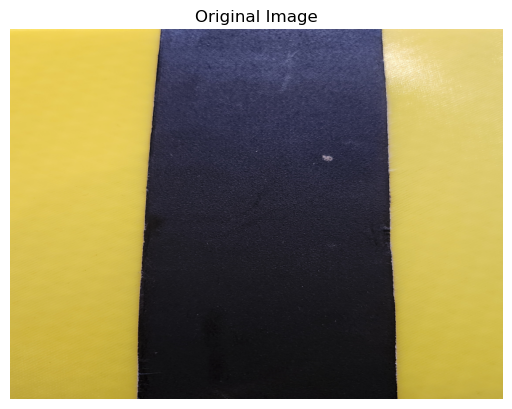

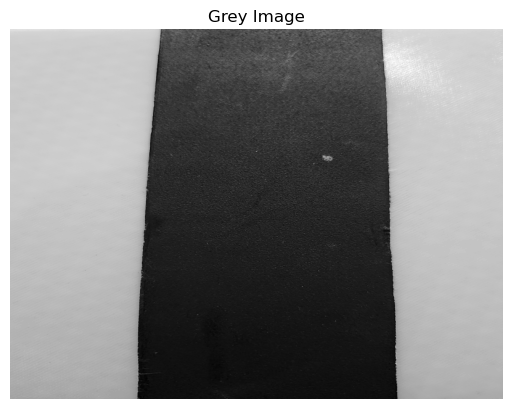

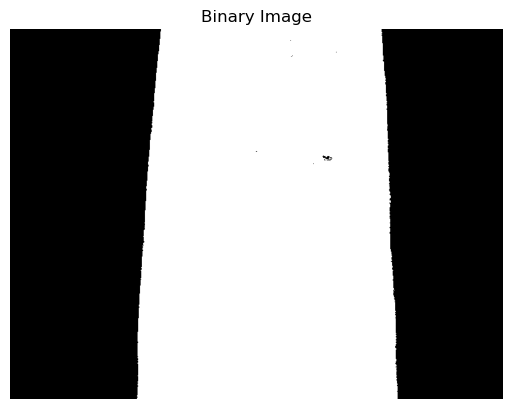

In [27]:
resize_dim = (800,600) #(width,height)

#Before obtaining a binary image we must use a grayscale image
orig_image = cv2.imread("tape_line.jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
grey_image = cv2.imread("tape_line.jpg",cv2.IMREAD_GRAYSCALE)
grey_image = cv2.resize(grey_image, resize_dim, interpolation=cv2.INTER_AREA) 
orig_image = cv2.resize(orig_image, resize_dim, interpolation=cv2.INTER_AREA) 

threshold = 127
max_val = 255

#If a pixel value is above threshold then set it to 1 (white) else 0 (black)
_, binary_image = cv2.threshold(grey_image, threshold, max_val, cv2.THRESH_BINARY)

#Currently, the tape is represented with black pixels while the yellow background is white pixels for the binary_image.
#However, contouring works in opencv by outlining the white objects in a black background, which in our case
#the object of interest is the black tape, so in order to use contouring later in this notebook we'll need to flipp the pixel values
binary_image = cv2.bitwise_not(binary_image)

plt.imshow(orig_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(grey_image,cmap='gray')
plt.title("Grey Image")
plt.axis('off')
plt.show()

plt.imshow(binary_image,cmap="grey")
plt.title("Binary Image")
plt.axis("off")
plt.show()

Notice from the binary image that black spots are showing up as noise within the tape region. We'll solve this using a morphological operation called dilate.
More info on morphological operations can be found from this yoututbe video: https://www.youtube.com/watch?v=uUweXBmm978

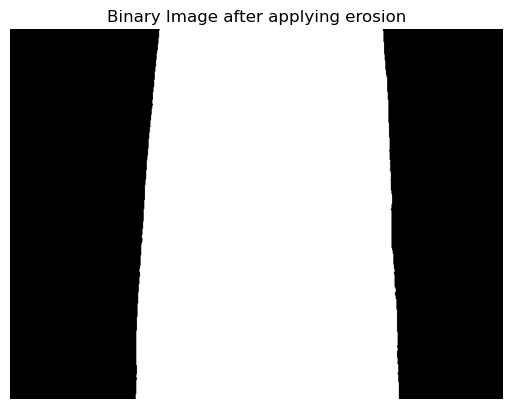

In [30]:
kernel = np.ones((5,5),np.uint8)
new_binary_image = cv2.dilate(binary_image,kernel,iterations=1)

plt.imshow(new_binary_image,cmap="grey")
plt.title("Binary Image after applying erosion")
plt.axis('off')
plt.show()

Next, lets take a look at obtaining the centroid of the taped line using moments in opencv.

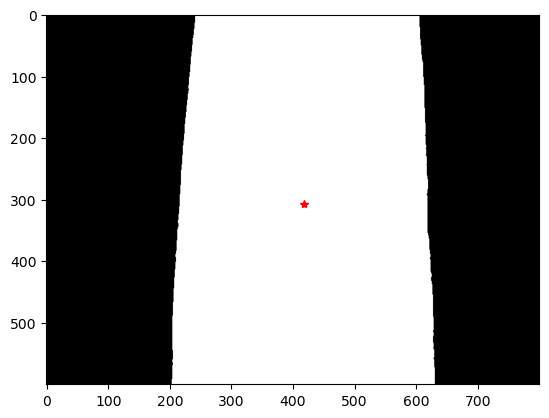

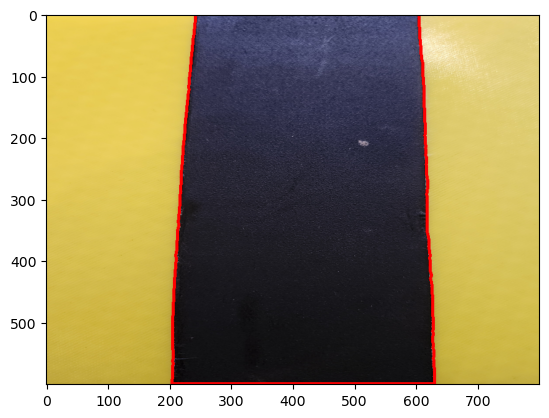

In [33]:
#First we must obtain the contours for the tape
contours, _ = cv2.findContours(new_binary_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = [contours[0]]
cv2.drawContours(orig_image,contours,-1,(255,0,0),3)

#Second lets label the centroid
M = cv2.moments(contours[0])
Cx = int(M['m10']/M['m00'])
Cy = int(M['m01']/M['m00'])

plt.imshow(new_binary_image,cmap="grey")
plt.plot(Cx,Cy,'r*')
plt.show()

plt.imshow(orig_image)
plt.show()
